## Introduction to Anomaly Detection

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

This overview will cover several methods of detecting anomalies, as well as how to build a detector in Python using simple moving average (SMA) or low-pass filter. 

## What are anomalies?
Before getting started, it is important to establish some boundaries on the definition of an anomaly. Anomalies can be broadly categorized as:

- Point anomalies: A single instance of data is anomalous if it's too far off from the rest. Business use case: Detecting credit card fraud based on "amount spent."
- Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data. Business use case: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.
-  Collective anomalies: A set of data instances collectively helps in detecting anomalies. Business use case: Someone is trying to copy data from a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack. 
- Anomaly detection is similar to — but not entirely the same as — noise removal and novelty detection. Novelty detection is concerned with identifying an unobserved pattern in new observations not included in training data — like a sudden interest in a new channel on YouTube during Christmas, for instance. Noise removal (NR) is the process of immunizing analysis from the occurrence of unwanted observations; in other words, removing noise from an otherwise meaningful signal. 

### Point Anomalies

N₁ and N₂ are regions with normal data because the majority of observations are in these areas. Points that are far away from normal areas, like points O₁, O₂ and region O₃ are anomalies. Anomalies in the data can occur for different reasons. Malicious activity, credit-card fraud, intrusions, system breakdowns, etc. These anomalies are attractive to the data analyst. Therefore, anomaly detection is an important process and is considered as an advantage in various decision-making systems.

<img src="graphics/point_anomaly.jpg"/> 

### Contextual Anomalies

.If object is anomalous in some defined context. Only in this case it is contextual anomaly (also known as conditional anomaly). In the next figure we can see an example of a  periodic context. In this case point O₁ is an anomaly, because it differs from periodic context shown in the graph.

<img src = "graphics/contextual_anomaly.png"/>

### Collective Anomalies

If some linked objects can be observed against other objects as anomalous Individual object can’t be anomalous in this case, only collection of objects.

We need to understand that these anomalies can be connected. Point anomalies could become contextual if we apply context to it. Or point anomalies could become collective, if we join multiple point anomalies together.

## Problems in detecting anomalies

On the abstract level detection of the anomalies seems like a simple task. But this task can be very challenging. Here are some challenges bellow:

- Defining normal regions are very difficult. In many cases boundaries between anomalies and normal data are not precise. In this case, normal observations could be considered as anomalies and vice-versa
- If action is malicious, like fraud, it is considered as anomaly. Very often attackers try to adapt their actions to the normal behaviour. This makes the task to identify anomalies more difficult. 
- What is considered normal today can be considered anomalous in the future. Most of the business systems change in time under the influence of the various factors
- Approaches for anomaly detection in one field more often cannot be used in the other one. They will be ineffective in most cases
- Training and validation data availability for model training is a big problem

## Anomaly Detection Techniques



### Simple Statistical Methods

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles. Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. Traversing mean over time-series data isn't exactly trivial, as it's not static. You would need a rolling window to compute the average across the data points. Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

### Challenges

The low pass filter allows you to identify anomalies in simple use cases, but there are certain situations where this technique won't work. Here are a few:  

- The data contains noise which might be similar to abnormal behavior, because the boundary between normal and abnormal behavior is often not precise. 
- The definition of abnormal or normal may frequently change, as malicious adversaries constantly adapt themselves. Therefore, the threshold based on moving average may not always apply.
- The pattern is based on seasonality. This involves more sophisticated methods, such as decomposing the data into multiple trends in order to identify the change in seasonality.

## Some ML algorithms for Anomaly Detection
There are usually three approaches for ML algorithms. 
- Density based anomaly detection. <br>Density-based anomaly detection is based on the k-nearest neighbors algorithm.
- Clustering-Based Anomaly Detection  <br>Clustering is one of the most popular concepts in the domain of unsupervised learning.
- Support Vector Machine-Based Anomaly Detection <br>A support vector machine is another effective technique for detecting anomalies.






### Density based anomaly detection. 

Assumption: Normal data points occur around a dense neighborhood and abnormalities are far away. 

The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:

K-nearest neighbor: k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.
Relative density of data: This is better known as local outlier factor (LOF). This concept is based on a distance metric called reachability distance.

### Clustering based anomaly detection. 

Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

### Support Vector Machine anomaly detection. 

 A SVM is typically associated with supervised learning, but there are extensions (OneClassCVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled). The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.

Depending on the use case, the output of an anomaly detector could be numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels).



Let's see an example of implementing a 'low pass filter' using rolling average. 

In [38]:

from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [37]:
# 3. Lets define some use-case specific UDF(User Defined Functions)

def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences.
    Args:
    -----
            data (pandas.Series): independent variable
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution

    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation 
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies

    """
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in zip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}

In [36]:
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

<class 'pandas.core.series.Series'>
<class 'range'>


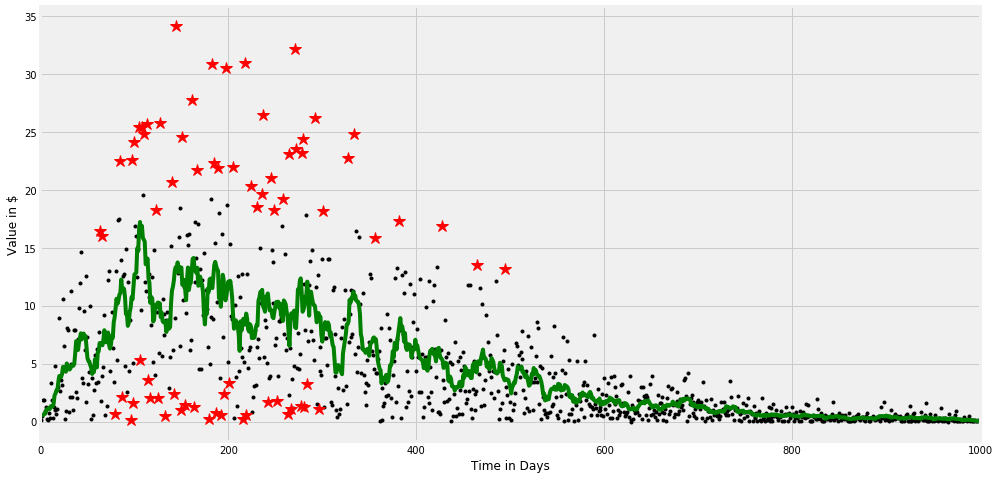

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).std()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


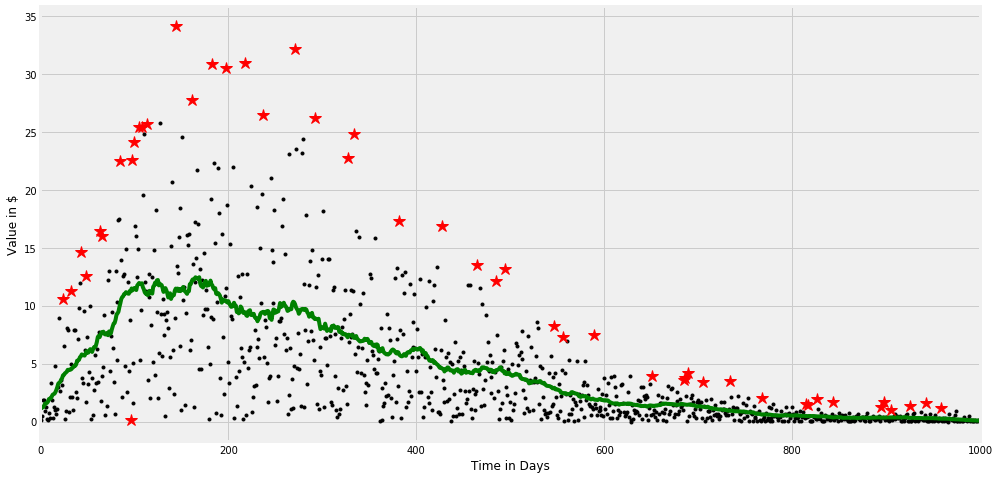

In [56]:
# Convenience function to add noise

def noise(yval):
    """ Helper function to generate random points """
    np.random.seed(0)
    return abs(0.2*np.asarray(yval)*np.random.normal(size=len(yval)))

# Generate a random dataset
def generate_random_dataset(size_of_array=1000, random_state=0):
    """ Helps in generating a random dataset which has a normal distribution
    Args:
    -----
        size_of_array (int): number of data points
        random_state (int): to initialize a random state

    Returns:
    --------
        a list of data points for dependent variable, pandas.Series of independent variable
    """
    np.random.seed(random_state)
    y = np.random.normal(0, 0.5, size_of_array)
    x = range(0, size_of_array)
   # y_new = [y_i + index**((size_of_array - index)/size_of_array) + noise(y) for index, y_i in zip(count(), y)]
    y_new = [y_i + index**((size_of_array - index)/size_of_array)  for index, y_i in zip(count(), y)]
    y_new = noise(y_new)
    return x, pd.Series(y_new)


# Lets play
x1, y1 = generate_random_dataset()
print (type(y1))
print (type(x1))
# Using stationary standard deviation over a continuous sample replicating
#plot_results(x1, y1, window_size=12, title_for_plot="Statinoary Standard Deviation",
  #                  sigma_value=2, text_xlabel="Time in Days", text_ylabel="Value in $")
plot_results(x1, y1, window_size=12, sigma_value=2, text_xlabel="Time in Days", text_ylabel="Value in $")


# using rolling standard deviation for
x1, y1 = generate_random_dataset()

#plot_results(x1, y1, window_size=50, title_for_plot="Using rolling standard deviation",
#            sigma_value=2, text_xlabel="Time in Days", text_ylabel="Value in $", applying_rolling_std=True)
plot_results(x1, y1, window_size=50,
             sigma_value=2, text_xlabel="Time in Days", text_ylabel="Value in $", applying_rolling_std=True)

 Here we will implement anomaly detection algorithm to detect outliers in computer servers.  
 
 To keep things simple we will use two features 1) throughput in mb/s and 2) latency in ms of response for each server. 
 
 The Gaussian model will be used to learn an underlying pattern of the dataset with the hope that our features follow the gaussian distribution. After that, we will find data points with very low probabilities of being normal and hence can be considered outliers. 
 
 For the training set, we will first learn the gaussian distribution of each feature for which mean and variance of features are required. Numpy provides the method to calculate both mean and variance (covariance matrix) efficiently. Similarly, Scipy library provide method to estimate gaussian distribution.

First let's  import requried libraries and defining functions for reading data, mean normalizing features and estimating gaussian distribution.

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score


In [59]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

Next, let's define a function to find the optimal value for our threshold (epsilon) that can be used to differentiate between normal and anomalous data points. 

For learning the optimal value of epsilon we will try different values in a range of learned probabilities on a cross-validation set. 

The f-score will be calculated for predicted anomalies based on the ground truth data available. The epsilon value with highest f-score will be selected as threshold i.e. the probabilities that lie below the selected threshold will be considered anomalous.

In [61]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

Next let's call the above defined functions to find anomalies in the dataset. Also, as we are dealing with only two features here, plotting helps us visualize the anomalous data points.

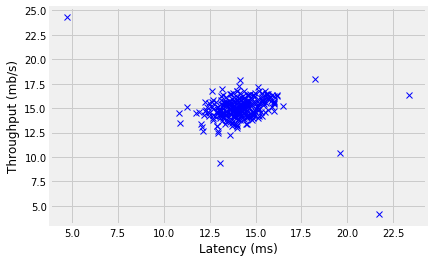

In [62]:
tr_data = read_dataset('../data/tr_server_data.csv') 
cv_data = read_dataset('../data/cv_server_data.csv') 
gt_data = read_dataset('../data/gt_server_data.csv')

n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]

plt.figure()
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.plot(tr_data[:,0],tr_data[:,1],"bx")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


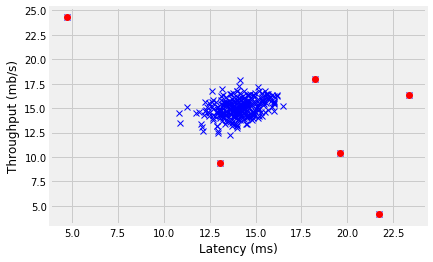

In [64]:
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
outliers = np.asarray(np.where(p < ep))

plt.figure() 
plt.xlabel("Latency (ms)") 
plt.ylabel("Throughput (mb/s)") 
plt.plot(tr_data[:,0],tr_data[:,1],"bx") 
plt.plot(tr_data[outliers,0],tr_data[outliers,1],"ro") 
plt.show()

## Anomaly Detection with Machine Learning. 

Next, we'll explore using a machine learning model to perform anomaly detection.  In the following example, we'll use a one-class Support Vector Machine to detect our anomalies. 

In this example we're going to work with HTTP access data from an open dataset from the KDD Cup '99, which consists of millions of network accesses containing multiple different types of attacks (alongside normal accesses) from a simulated military network. You can get the dataset here. We're using the 10 percent set containing a little under half a million datapoints and 3 (of 41) features (columns) that are relevant for HTTP requests.

### VISUALISING THE DATA
Before we get started training a SVM model, we need to know what our data is like. 


In [2]:
%matplotlib inline

import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib

# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
df = pd.read_csv('../data/kddcup.data_10_percent.csv',header=None,low_memory=False,)
#df.columns = range(0,42)

df = df[(df[2] == 'http') & (df[11] == 1)] 

The full dataset contains 41 features with data relating to TCP packets, SMTP access, etc. but only 3 of those are relevant for HTTP. We need to extract those 3 features so we're not training with irrelevant ones that will muddy our model. Also, SVM implementations work better with normalised data. This yields both better accuracy and reduces numerical instability that is inherent in their implementation.

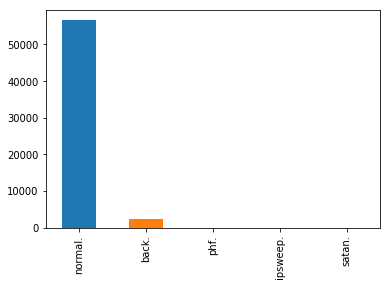

In [3]:
extract = []

for index,row in df.iterrows():
    extract.append( [row[0],row[4],row[5],row[41]])
    
data = pd.DataFrame(data = extract,columns = ['duration','src_bytes','dst_bytes','label'])
data.label.value_counts().plot(kind='bar')  

In [4]:
data.loc[data['label'] == 'normal.', 'attack'] = 1
data.loc[data['label'] != 'normal.', 'attack'] = -1
data.head(500)

,duration,src_bytes,dst_bytes,label,attack
0,0,181,5450,normal.,1.0
1,0,239,486,normal.,1.0
2,0,235,1337,normal.,1.0
3,0,219,1337,normal.,1.0
4,0,217,2032,normal.,1.0
5,0,217,2032,normal.,1.0
6,0,212,1940,normal.,1.0
7,0,159,4087,normal.,1.0
8,0,210,151,normal.,1.0
9,0,212,786,normal.,1.0


Later we're going to use scikit-learn's OneClassSVM predict function to generate output. This returns +1 or -1 to indicate whether the data is an "inlier" or "outlier" respectively. To make comparison easier later we'll replace our data's label with a matching +1 or -1 value. This also transforms our data from multi-class (multiple different labels) to one-class (boolean label), which is a prerequisite for using a one-class SVM.

In [5]:
target = data['attack']
outliers = target[target == -1]  
non_outliers = target[target == 1]
print ('non-outliers.shape',non_outliers.shape)
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])
data.drop(["label", "attack"], axis=1, inplace=True)
data.shape  


non-outliers.shape (56516,)
outliers.shape (2209,)
outlier fraction 0.03761600681140911


(58725, 3)

Next we're going to split our dataset into a training and a testing segment using a ratio of 4:1. By doing this we're setting aside a subset of the data for testing our trained model, to ensure we're getting the correct results. Testing with the same data we used for training can lead to invalid results as a trained model will typically do well at classifying the examples it was trained with! (Note that in unsupervised machine learning this isn't necessarily the case.)

In [6]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)  
train_data.shape  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(46980, 3)

Now we're ready to train our model. We do this by calling the fit function from scikit-learn's svm.OneClassSVM. It accepts a few parameters but the most important are nu, kernel, and for the RBF kernel we'll be using, gamma.

- nu is "An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors" and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data. This is an important factor to consider when assessing algorithms. Many unsupervised ML algorithms require you to know (or hint at) the number of outliers or class members you expect.
- kernel is the kernel type to be used. Earlier we discussed SVM's ability to use a non-linear function to project the hyperspace to higher dimension. Setting kernel to something other than linear here will achieve that. The default is rbf (RBF - radial basis function).
- gamma is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "smoothness" of the model. A low value improves the smoothness and "generalizability" of the model, while a high value reduces it but makes the model "tighter-fitted" to the training data. Some experimentation is often required to find the best value.


We already know that the proportion of attacks in our data is about 4%. We'll get the precise fraction and use that for nu below. 

In [7]:
from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
train_data.head(20)
model.fit(train_data)  

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
      max_iter=-1, nu=0.03761600681140911, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

We now have two ways to make use of the trained model:

- Find the distance from the hyperplane of some samples using decision_function. The distance is on an arbitrary scale so to make use of it we need to either define a threshold to use or scale it to something useful
- Perform a regression on some samples using predict. This will return values +1 or -1 indicating whether or not the sample(s) are "in class" or "out of class" (are normal or abnormal relative to the trained model)

Before we use the model we would like to know its accuracy - how good it is at predicting the right class for data. To do that we'll use the predict function on our data and then use sklearn's built-in analysis functions to compare the labels between the predict output and our  target, which we set up earlier on.

In [8]:
from sklearn import metrics  
preds = model.predict(train_data)  
targs = train_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))  

accuracy:  0.9570455512984248
precision:  0.9991910694062449
recall:  0.9561428729403959
f1:  0.9771931014217582
area under curve (auc):  0.9681564223058918


This shows at our model predicts with ~98% accuracy the class of the data from the training set. Not bad. Precision, recall, F1, and AUC are all measures of the model's effectiveness at predicting classes. The closer to 1.0 they are, the better.

In [9]:
preds = model.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.9494252873563218
precision:  0.9995334515256135
recall:  0.9478807185204849
f1:  0.9730220728494868
area under curve (auc):  0.9683097286296118
